# 1. Import the libraries 

In [1]:
from keras.preprocessing.text import text_to_word_sequence
from keras.preprocessing.text import Tokenizer  
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, GRU, Dropout,Embedding ,Dense
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm

Using TensorFlow backend.
C:\Users\annab\Anaconda3\envs\ads08\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\annab\Anaconda3\envs\ads08\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\annab\Anaconda3\envs\ads08\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\annab\Anaconda3\envs\ads08\lib\site-pa

# 2. Load data 

In [25]:
df=pd.read_csv('train.csv')
df.shape

(1804874, 45)

In [26]:
# I only look into 5% of the data. 
def frac(dataframe, fraction, other_info=None):

    return dataframe.sample(frac=fraction)


df_small = frac(df, 0.05)
print(df_small.shape)
df_small.head()

(90244, 45)


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
1710681,6219441,0.5,Darn. Conspiracies make everything so easy!,0.0,0.5,0.0,0.4,0.0,NaN,NaN,...,393015,approved,2,0,0,0,0,0.0,0,10
1708699,6217030,0.6,But it wasn't a paramedic. It wasn't even a ...,0.0,0.0,0.4,0.1,0.0,NaN,NaN,...,392779,approved,3,0,0,3,2,0.1,0,10
56086,310763,0.0,whether she got the goldmine or the shaft - sh...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,75512,approved,0,0,0,3,0,0.0,0,4
1759063,6277729,0.0,Any tweet from the dotard yet? Seems his coun...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,396046,rejected,0,0,0,0,0,0.0,0,5
1289248,5690153,0.2,"There is always ""chaos"" inside the beltway whe...",0.0,0.0,0.0,0.2,0.0,NaN,NaN,...,361265,approved,4,0,1,3,3,0.0,0,10


# 3. Select relevant features

In [27]:

df_small = df_small[['target','comment_text']]
df_small.head(10)

,target,comment_text
1710681,0.5,Darn. Conspiracies make everything so easy!
1708699,0.6,But it wasn't a paramedic. It wasn't even a ...
56086,0.0,whether she got the goldmine or the shaft - sh...
1759063,0.0,Any tweet from the dotard yet? Seems his coun...
1289248,0.2,"There is always ""chaos"" inside the beltway whe..."
986635,0.0,I have property in Talkeetna and I say drill it.
388121,0.0,"Pot is NOT the same as it was ""back in the day..."
1340641,0.2,Interesting article. Perhaps there would be m...
270525,0.0,"""The change also poses a practical problem for..."
458720,0.0,JImbo5 So if its negligible how does a tax o...


# 4. Tfidf method

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

# Build tfidf vectorizers from the review column and with max of 100 features

vect = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS, max_features=100, token_pattern=r'\b[^\d\W][^\d\W]+\b').fit(df_small.comment_text) 

# Transform the vectorizers

X = vect.transform(df_small.comment_text)

# Create DataFrames from the vectorizers 
X_df = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

print('Top 5 rows using tfidf: \n', X_df.head())

Top 5 rows using tfidf: 
    actually  agree  alaska  article  away       bad  believe  best  better  \
0       0.0    0.0     0.0      0.0   0.0  0.000000      0.0   0.0     0.0   
1       0.0    0.0     0.0      0.0   0.0  0.000000      0.0   0.0     0.0   
2       0.0    0.0     0.0      0.0   0.0  0.267939      0.0   0.0     0.0   
3       0.0    0.0     0.0      0.0   0.0  0.000000      0.0   0.0     0.0   
4       0.0    0.0     0.0      0.0   0.0  0.000000      0.0   0.0     0.0   

   big  ...  way  white  women  won  work  world  wrong  year  years  yes  
0  0.0  ...  0.0    0.0    0.0  0.0   0.0    0.0    0.0   0.0    0.0  0.0  
1  0.0  ...  0.0    0.0    0.0  0.0   0.0    0.0    0.0   0.0    0.0  0.0  
2  0.0  ...  0.0    0.0    0.0  0.0   0.0    0.0    0.0   0.0    0.0  0.0  
3  0.0  ...  0.0    0.0    0.0  0.0   0.0    0.0    0.0   0.0    0.0  0.0  
4  0.0  ...  0.0    0.0    0.0  0.0   0.0    0.0    0.0   0.0    0.0  0.0  

[5 rows x 100 columns]


In [29]:
X_df.shape

(90244, 100)

# 5. Feature Engineering 

In [49]:
from sklearn.linear_model import LogisticRegression


# Define the vector of targets and matrix of features
y = [1 if x >0.5 else 0 for x in df_small.target]
X = X_df

In [31]:
sum(y)/len(y)

0.05825318026683214

# Conclusion: 
- The dataset is highly inbalanced. 

# 6. Train and test split

In [32]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.2, random_state=42)

# 7. LogisticRegression 

In [33]:


# Build a logistic regression model and print out the accuracy
log_reg = LogisticRegression().fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)

print('Accuracy on train set: ', log_reg.score(X_train, y_train))
print('Accuracy on test set: ', log_reg.score(X_test, y_test))

Accuracy on train set:  0.941782671930189
Accuracy on test set:  0.9416034129314643


In [37]:
evaluate(y_test,y_pred_log)

Accuracy score test set:  0.9416034129314643
----------------------------------------
Confusion matrix test set: 
 [[0.94160341 0.        ]
 [0.05839659 0.        ]]
----------------------------------------
Accuracy = 0.94160
Precision = 0.00000
Recall = 0.00000
F1 score = 0.00000

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16995
           1       0.00      0.00      0.00      1054

    accuracy                           0.94     18049
   macro avg       0.47      0.50      0.48     18049
weighted avg       0.89      0.94      0.91     18049



C:\Users\annab\Anaconda3\envs\ads08\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\annab\Anaconda3\envs\ads08\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
confusion_matrix(y_test,y_pred_log)

array([[16995,     0],
       [ 1054,     0]], dtype=int64)

## Observation 
- Not very good result, the recall says this model will always predict the article which is not toxic correctly.
- But it will never catch the article which is toxic. 
- We need to find another method. 

# 7. Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier


# Build a RFC model and print out the accuracy
rfc = RandomForestClassifier().fit(X_train,y_train)
y_pred_rfc = rfc.predict(X_test)


In [40]:
# Print the performance metrics
evaluate(y_test,y_pred_rfc)

Accuracy score test set:  0.9388885810848246
----------------------------------------
Confusion matrix test set: 
 [[9.38666962e-01 2.93645077e-03]
 [5.81749681e-02 2.21618926e-04]]
----------------------------------------
Accuracy = 0.93889
Precision = 0.07018
Recall = 0.00380
F1 score = 0.00720

Classification Report
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     16995
           1       0.07      0.00      0.01      1054

    accuracy                           0.94     18049
   macro avg       0.51      0.50      0.49     18049
weighted avg       0.89      0.94      0.91     18049



In [41]:
confusion_matrix(y_test,y_pred_rfc)

array([[16942,    53],
       [ 1050,     4]], dtype=int64)

# Conclusion 
- The model RFC is better than Logistic but still yield very poor result.
- Now balance the dataset. 

# 8. Balance the dataset 

## SMOTE

In [44]:
print(f'''% Positive class in Train = {np.round(pd.Series(y_train).value_counts(normalize=True)[1] * 100, 2)}
% Positive class in Test  = {np.round(pd.Series(y_test).value_counts(normalize=True)[1] * 100, 2)}''')

% Positive class in Train = 5.82
% Positive class in Test  = 5.84


In [45]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [50]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X_df, y)


print(f'''Shape of X before SMOTE: {X_df.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
pd.Series(y_sm).value_counts(normalize=True) * 100

Shape of X before SMOTE: (90244, 100)
Shape of X after SMOTE: (169974, 100)

Balance of positive and negative classes (%):


1    50.0
0    50.0
dtype: float64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

# 9.Classifers after SMOTE

Accuracy score test set:  0.8246506839241065
----------------------------------------
Confusion matrix test set: 
 [[0.36346522 0.13587292]
 [0.03947639 0.46118547]]
----------------------------------------
Accuracy = 0.82465
Precision = 0.77243
Recall = 0.92115
F1 score = 0.84026

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.73      0.81     16975
           1       0.77      0.92      0.84     17020

    accuracy                           0.82     33995
   macro avg       0.84      0.82      0.82     33995
weighted avg       0.84      0.82      0.82     33995

Accuracy = 0.82
Recall = 0.92



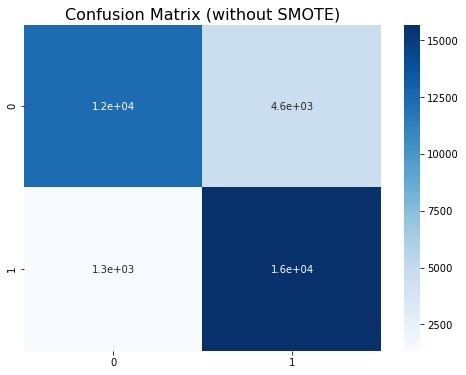

In [52]:
# Random Forest Classifer

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
evaluate(y_test,preds)
evaluate_vision(y_test,preds)


## LogisticRegression with SMOTE



C:\Users\Annabel\anaconda3\envs\ads08\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy = 0.61
Recall = 0.64



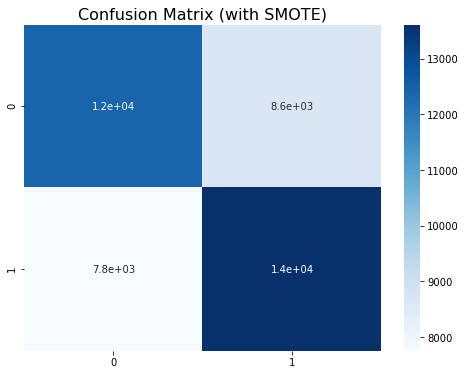

In [31]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

In [32]:
#print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y_test, preds)))
print('Precision = {:.5f}'.format(metrics.precision_score(y_test,preds)))
print('Recall = {:.5f}'.format(metrics.recall_score(y_test, preds)))
print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, preds)))

print('\nClassification Report')
print(metrics.classification_report(y_test, preds))

Accuracy = 0.61337
Precision = 0.61146
Recall = 0.63713
F1 score = 0.62403

Classification Report
              precision    recall  f1-score   support

           0       0.62      0.59      0.60     21057
           1       0.61      0.64      0.62     21363

    accuracy                           0.61     42420
   macro avg       0.61      0.61      0.61     42420
weighted avg       0.61      0.61      0.61     42420



## Conclusion: 
- After resampled the dataset, the RF result was much better compared with previous


# LogisticRegression With Regularization + SMOTE

In [33]:
C = [10, 1, .1, .001]
for c in C:
    clf = LogisticRegression(penalty='l2', C=c, solver='liblinear')
    clf.fit(X_train, y_train)
    print('C:', c)
    #print('Coefficient of each feature:', clf.coef_)
    print('Training accuracy:', clf.score(X_train, y_train))
    print('Test accuracy:', clf.score(X_test, y_test))
    print('')

C:\Users\Annabel\anaconda3\envs\ads08\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C: 10
Training accuracy: 0.6168709728115669
Test accuracy: 0.6134370579915135



C:\Users\Annabel\anaconda3\envs\ads08\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C: 1
Training accuracy: 0.6168945465975169
Test accuracy: 0.6133663366336634



C:\Users\Annabel\anaconda3\envs\ads08\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C: 0.1
Training accuracy: 0.6166116611661167
Test accuracy: 0.6132484677039133

C: 0.001
Training accuracy: 0.6050762219079051
Test accuracy: 0.6052333804809052



C:\Users\Annabel\anaconda3\envs\ads08\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


C:\Users\Annabel\anaconda3\envs\ads08\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy = 0.61
Recall = 0.64



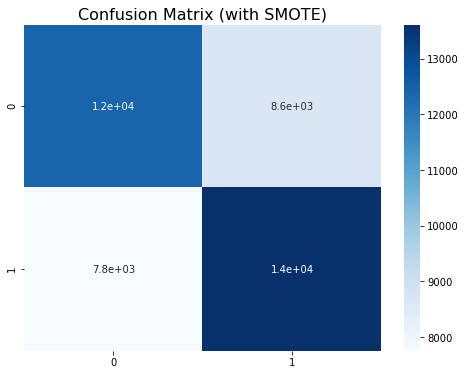

In [34]:
# Choose the best model from above 
model = LogisticRegression(random_state=42, C=1, penalty='l2')
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
cm = confusion_matrix(y_test, preds)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix (with SMOTE)', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

# Conclusion
- Regularization does not help much to improve the model. 


# 9. Neural Network

In [110]:
y_sm

,0
0,0
1,0
2,0
3,0
4,0
...,...
169745,1
169746,1
169747,1
169748,1


In [113]:
X_train, X_test, y_train, y_test = train_test_split(
    X_sm, y_sm, test_size=0.2, random_state=42
)


# Check the dimension of the sets
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (135800, 100)
y_train: (135800, 1)
X_test: (33950, 100)
y_test: (33950, 1)


In [114]:
## Change to use Neural Network 
import keras
from keras.layers import Dense
from keras.models import Sequential

def get_new_model():
    n_cols = 100
    model = Sequential()
    model.add(Dense(100, input_shape=(n_cols,),activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1,activation = 'hard_sigmoid'))
    return model

In [115]:
# compiling the model
basic_model = get_new_model()
sgd = keras.optimizers.SGD(lr=0.5, momentum=0.9, nesterov=True)
basic_model.compile(loss = 'binary_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [116]:
from tensorflow.keras.callbacks import EarlyStopping
# training the model
#basic_model.fit(X_train, y_train, epochs=100)
early_stopping_monitor= EarlyStopping(patience=2)
basic_model.fit(X_train,y_train,epochs=15,callbacks=[early_stopping_monitor],validation_split=0.4)

Epoch 1/15
2547/2547 [==============================] - 2s 789us/step - loss: 0.6932 - accuracy: 0.5041 - val_loss: 0.6909 - val_accuracy: 0.5552
Epoch 2/15
2547/2547 [==============================] - 2s 730us/step - loss: 0.6898 - accuracy: 0.5560 - val_loss: 0.6873 - val_accuracy: 0.5764
Epoch 3/15
2547/2547 [==============================] - 2s 726us/step - loss: 0.6848 - accuracy: 0.5848 - val_loss: 0.6780 - val_accuracy: 0.5906
Epoch 4/15
2547/2547 [==============================] - 2s 734us/step - loss: 0.6738 - accuracy: 0.5945 - val_loss: 0.6634 - val_accuracy: 0.6032
Epoch 5/15
2547/2547 [==============================] - 2s 735us/step - loss: 0.6579 - accuracy: 0.6041 - val_loss: 0.6525 - val_accuracy: 0.6143
Epoch 6/15
2547/2547 [==============================] - 2s 725us/step - loss: 0.6485 - accuracy: 0.6158 - val_loss: 0.6459 - val_accuracy: 0.6193
Epoch 7/15
2547/2547 [==============================] - 2s 738us/step - loss: 0.6430 - accuracy: 0.6210 - val_loss: 0.6410 -

In [117]:

# Test, Loss and accuracy
loss_and_metrics = basic_model.evaluate(X_test, y_test,verbose=0)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

Loss =  7.567077159881592
Accuracy =  0.5037702322006226


# Tuning the NN network

In [118]:
type(y_train)

pandas.core.frame.DataFrame

In [119]:
from keras.utils import to_categorical
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

2


In [120]:
model = Sequential()
model.add(Dense(500, activation='relu', input_dim=100))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(2, activation='softmax'))


# Compile the model
sgd = keras.optimizers.SGD(lr=0.5, momentum=0.9, nesterov=True)
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [121]:

from keras import callbacks
earlystopping = callbacks.EarlyStopping(monitor ="val_loss", 
                                        mode ="min", patience = 5, 
                                        restore_best_weights = True)

model.fit(X_train,y_train,epochs=30,validation_split=0.4)

Epoch 1/30
2547/2547 [==============================] - 3s 1ms/step - loss: 0.6885 - accuracy: 0.5468 - val_loss: 0.6710 - val_accuracy: 0.5883
Epoch 2/30
2547/2547 [==============================] - 2s 957us/step - loss: 0.6634 - accuracy: 0.5980 - val_loss: 0.6490 - val_accuracy: 0.6139
Epoch 3/30
2547/2547 [==============================] - 2s 964us/step - loss: 0.6480 - accuracy: 0.6125 - val_loss: 0.6405 - val_accuracy: 0.6231
Epoch 4/30
2547/2547 [==============================] - 2s 974us/step - loss: 0.6375 - accuracy: 0.6252 - val_loss: 0.6384 - val_accuracy: 0.6328
Epoch 5/30
2547/2547 [==============================] - 2s 962us/step - loss: 0.6317 - accuracy: 0.6320 - val_loss: 0.6295 - val_accuracy: 0.6286
Epoch 6/30
2547/2547 [==============================] - 2s 964us/step - loss: 0.6238 - accuracy: 0.6411 - val_loss: 0.6172 - val_accuracy: 0.6501
Epoch 7/30
2547/2547 [==============================] - 2s 959us/step - loss: 0.6106 - accuracy: 0.6567 - val_loss: 0.6043 - v

In [128]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)

print('Accuracy on training data: {}'.format(scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}'.format(scores2[1]))    

Accuracy on training data: 0.8157510757446289
Accuracy on test data: 0.7983799576759338


# Conclusion
- Adding more layers definitely improved the accuracy of NN model from 50% to 80%. 
- So far Random Forest Classifer still yields better result by 2%. 
- Perhaps with more tunning NN might perform better. 

# Self-defined functions 

In [35]:

# other evaluation metrics:
def evaluate(y_test,y_pred):
    
    print('Accuracy score test set: ', accuracy_score(y_test, y_pred))
    print('-'*40)
    
    print('Confusion matrix test set: \n', confusion_matrix(y_test, y_pred)/len(y_test))
    print('-' *40)
    
    print('Accuracy = {:.5f}'.format(accuracy_score(y_test, y_pred)))
    print('Precision = {:.5f}'.format(metrics.precision_score(y_test,y_pred)))
    print('Recall = {:.5f}'.format(metrics.recall_score(y_test, y_pred)))
    print('F1 score = {:.5f}'.format(metrics.f1_score(y_test, y_pred)))

    print('\nClassification Report')
    print(metrics.classification_report(y_test, y_pred))

In [36]:
# Evaluate
from sklearn.metrics import recall_score
import seaborn as sns
def evaluate_vision(y_test,preds):
    print(f'Accuracy = {accuracy_score(y_test, preds):.2f}\nRecall = {recall_score(y_test, preds):.2f}\n')
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(8, 6))
    plt.title('Confusion Matrix (without SMOTE)', size=16)
    sns.heatmap(cm, annot=True, cmap='Blues');

C:\Users\annab\Anaconda3\envs\ads08\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
